In [1]:
%load_ext autoreload

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
                                 
%matplotlib inline

In [3]:
%autoreload 5
from crop_letters import binary, cut_lines, cut_words, contour_letters_cut_28x28, contour_letters_draw

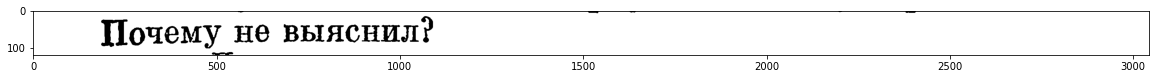

In [15]:
img = cv2.imread("book_page_test_dark.png")
coeff = 5000/img.shape[0]
if coeff < 1:
    img = cv2.resize(img, (int(img.shape[1]*coeff), int(img.shape[0]*coeff)), cv2.INTER_AREA)
else:
    img = cv2.resize(img, (int(img.shape[1]*coeff), int(img.shape[0]*coeff)), cv2.INTER_LINEAR)
img = img[890:1010, :]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20, 20))
plt.imshow(binary(gray)[1], cmap='gray')

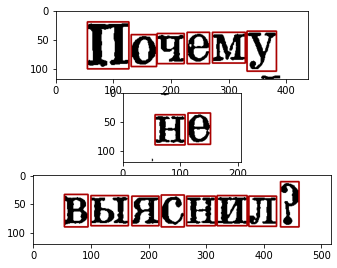

In [16]:
lines = cut_lines(binary(gray)[1])

max_words = 20

plt.figure(figsize=(30, 30))

for i, line in enumerate(lines):
    words = cut_words(line)
    for j, word in enumerate(words):
        plt.subplot(max_words, len(lines), j*len(lines) + i + 1)
        contour_letters_draw(word.T)

In [17]:
words = contour_letters_cut_28x28(gray)

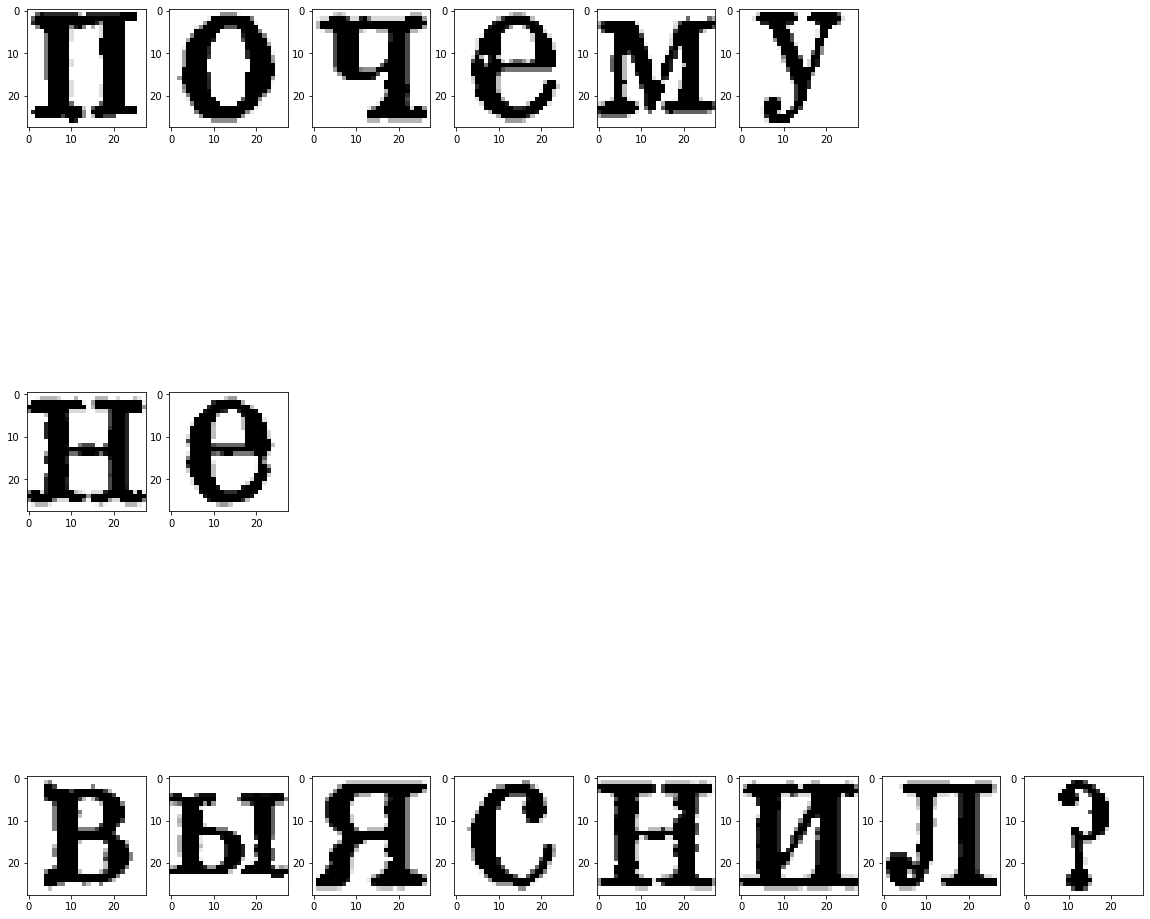

In [18]:
h = words.shape[0]
w = np.max([words[i].shape[0] for i in range(h)])

plt.figure(figsize=(20, 20))

for i, word in enumerate(words):
    for j in range(word.shape[0]):
        letter = word[j]
        plt.subplot(h, w, i*w + j+1)
        plt.imshow(np.array(letter, dtype='float'), cmap='gray')